# Perform image registration to correct motion 

Memory maps a file and performs motion correction. Use ``apply_shifts=False`` to run without changing the data.

The file needs to be mapped in ``r+`` mode


In [2]:
localdisk = '/mnt/dual/temp_folder/CSP23_20200226' # this should be an SSD or a fast drive
from wfield import *

dat_path = glob(pjoin(localdisk,'*.dat'))[0]
# open file with read/write 
dat = mmap_dat(dat_path, mode='r+')

yshifts,xshifts = motion_correct(dat,chunksize=512,
                                 apply_shifts=True)
del dat # close and finish writing

# save the shifts
shifts = np.rec.array([yshifts,xshifts],dtype=[('y','int'),('x','int')])
np.save(pjoin(localdisk,'motion_correction_shifts.npy'),shifts)


Motion correction: 100%|██████████| 82/82 [12:07<00:00,  8.88s/it]


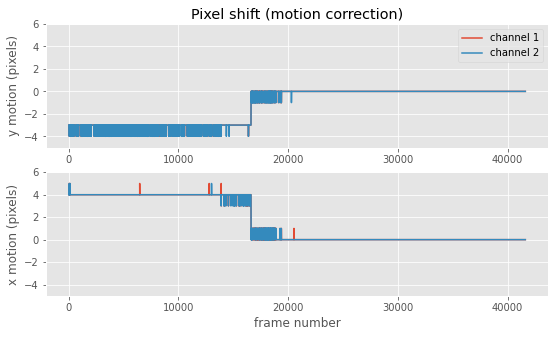

In [1]:
# plot the shifts

from wfield import *

import pylab as plt
plt.matplotlib.style.use('ggplot')

%matplotlib inline

localdisk = '/mnt/dual/temp_folder/CSP23_20200226' # this should be an SSD or a fast drive

shifts = np.load(pjoin(localdisk,'motion_correction_shifts.npy'))

plot_summary_motion_correction(shifts,localdisk);

In [46]:
# Look at the results
dat = mmap_dat(dat_path, mode='r')
napari_show(dat)

Motion correction: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]


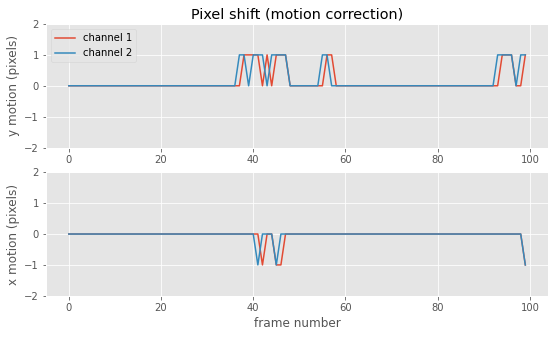

In [12]:
dat_path = '/mnt/dual/temp_folder/CSP23_20200226/frames_2_540_640_uint16.dat'

# This will load a file to memory, perform motion correction and return the data
from wfield.ncaas import load_and_motion_correct 
Y = load_and_motion_correct(dat_path,
                            chunksize = 1048,     # increase:use more memory
                            mmap = False,         # true: overwrite raw
                            flatten_frames=False) # true: combine frames and channels


(200, 540, 640)